# MNIST with machine learning

In this exercise we will give MNIST digits another try, but this time we will apply what we've learnt about machine learning algorithms. The idea is to correctly estimate the best parameter(s) for an algorithm in order to get the highest accuracy. At the end of this exercise you will upload your results to [this Kaggle contest](https://www.kaggle.com/c/digit-recognizer).

## Loading the dataset

Here we will load the Kaggle training set and test set. The training is a CSV with 42000 rows and 785 columns (28x28 pixels + 1 label), while the test set has 28000 rows and 784 columns. The test set in this exercise is used only for submission to Kaggle, which means you will have to do cross-validation on only the training set.

In [8]:
import pandas as pd

data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

We visualize training data and its types.

In [9]:
print(data.dtypes)
data.head()

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the first column here is the label that indicates the digit of the corresponding pixels. We will change its type to be categorical. 

In [10]:
data.label = data.label.astype("category")
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

We can see that the different labels are somewhat evenly distributed. We can also describe a column to see the different values a pixel can take.

In [11]:
data.pixel774.describe()

count    42000.000000
mean         0.219286
std          6.312890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        254.000000
Name: pixel774, dtype: float64

## Workshop: Fitting KNN

Integrantes (3 max):
- Nicolas Taborda Hoyos
- Alejandro Peña 

We will now fit a KNN model to the data, first we split the data to perform stratified cross validation. We have to stratify since the probabilities of each label are slightly different.

### Splitting the data

We will split the data using 20% of it as a **validation** set.

In [12]:
from sklearn.model_selection import train_test_split

data_train_pixeles , data_test_pixeles, data_train_target, data_test_target = train_test_split(data.drop("label", axis = 1), data.label, stratify=data.label, test_size = 0.2)

subset_train_pixeles= data_train_pixeles.iloc[0:3000,]
subset_test_pixeles= data_test_pixeles.iloc[0:700,]
subset_train_target= data_train_target.iloc[0:3000,]
subset_test_target= data_test_target.iloc[0:700,]



### Finding the K

Now we will find the K by trying powers of 10 followed by different K's 1000 at a time until an arbitrarilly chosen 30000 neighbors max.

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
import seaborn as sns

# TODO: Here you will choose the possible K values

ks = list(range(1, 10))
accuracies = []
print ("Antes For")
for k in ks:
    print("Model")
    model = KNeighborsClassifier(n_neighbors=k).fit(subset_train_pixeles, subset_train_target.values.ravel())
    print("score")
    score = model.score(subset_test_pixeles, subset_test_target.values.ravel())
    print(k)
    accuracies.append(score)
 




Antes For
Model
score
1
Model
score
2
Model
score
3
Model
score
4
Model
score
5
Model
score
6
Model
score
7
Model
score
8
Model
score
9


Now we will visualize the error result.

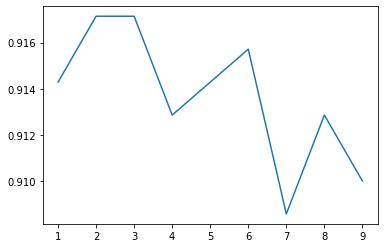

In [14]:
import matplotlib.pyplot as plt

plt.plot(ks, accuracies)